TODO:
- Describe HBc.. Columns

# 4Da Medical Data Analysis and Visualisation FS
**Authors:** Roman Studer, Alexandre Rau

**Goal:** The goal of the Medical Challenge is the automated classification of the eye disease uveities. The goal is to find the best possible model for classifying the disease based on a data set of +1000 patients. Important features for the prediction are to be identified.

## Detailed Description
The detailed description was taken from the job description on the [DS-Spaces website](https://ds-spaces.technik.fhnw.ch/medical-data-analysis-and-visualisation-fs/#menu-second) on 08/03/2021: 

In this international challenge, you will work in collaboration with Prof. Dr. Nida Şen (MD, MHS, Director of the Uveitis Clinic at the National Eye Institute, Washington DC) and her team, including Dr. Shilpa Kodati. Dr. David Kuo (MD, Biomed Eng.) of University of California, San Diego is also glad to support to project (in an asynchronous manner due to the large differences in time zones). You can listen to a 25-min podcast interview with Dr. Şen to get a first impression of her research agenda. Using real data obtained from 1075 patients with 55 markers (more  detailed description below), you will delve into computational methods for medical research to identify which markers are relevant for the diagnosis of uveitis, a common eye disease. 

**International and interdisciplinary** setting As the description above suggests, an exciting and challenging aspect of this challenge is in its interdisciplinarity and internationality. You will experience different academic cultures, professional roles/backgrounds and fully practice your English in a professional setting. The collaborative international work means several virtual meetings with our international partner and requires some flexibility due to time zones. These interactions will serve as an opportunity to practice and reflect on questions related to intercultural competence, i.e., intercultural communication and collaboration. Since it is a medical challenge you will also need to learn new terminology and communicate your ideas to a client of a different field.

**Description of the disease**  Uveitis is a group of inflammatory diseases of the uveal tract of the eye. It is a sight-threatening autoimmune disease and it is responsible for approximately 10-15% of blindness. This disease has a real and sizable impact: Besides its life-changing negative implications for the individual, it also has consequences for the society, because it affects people in their most productive work years and thus leads to a socioeconomic burden. Uveitis is a multifactorial condition and its causes are not fully understood despite recent advances. Challenges in clinical uveitis research include disease heterogeneity, lack of understanding of what triggers and what propagates the disease. 

## Tasks
Imagine that you are a part of a scientific team, working in the team’s data science unit. The above-mentioned dataset, already pre-processed & cleaned, is delivered to you with the following request: Using an exploratory (agnostic) data science and machine learning approach, analyze which of the variables might 

a) have strong correlations with each other, and with the diagnosed diseases of patients and patient groups

b) lead to the identification (prediction) of the uveitis subtypes which may inform eventual diagnosis

c) compare the HLA haplotypes in healthy controls to those in the project data, check if they correlate with specific subgroups. This will help verifying genetic predictors of certain subtypes of disease in this uveitis cohort. Data from healthy controls, i.e., normative data is publicly available as a separate data set (also see “Data” section below)

d) analyze if the steps in the preprocessing could be improved

e) which missing value strategy is best.

We expect that you use a combination of exploratory data analysis (see competence ‘eda‘) probability testing, machine learning (see competences ule, sul) and visual analytics (see competence ‘van‘) to conduct your analyses. Using machine learning (ML), you will search for patterns and anomalies in the data, profile patients and/or patient groups (e.g., genetic profiles or patient history, their state vs. normative baseline data). Using visual analytics (VA) you will visualize/plot to demonstrate the relationships between variables and what ML detects using multiple linked views.

The project management will be inspired in scrum. Code and artifacts should be documented in a git repository. After 1 or 2 weeks in the project a proposal of focus of the challenge group should be submitted to the challenge owners, preferably with a rough roadmap.

As a data scientist, you will need to interpret and give context to your findings in order to enhance their value.

You may also explore (optional) visualizing ML algorithm’s decisions (as a meta tool to make ML “understandable”). Such an analysis will facilitate the dialogue with the domain expert when analyzing which factor was (potentially) responsible for which impact. Note that understandable (explainable, interpretable) machine learning is a large and advanced topic. If you are curious about it, a good starting point maybe to learn about the decision tree concept: Decision Tree for starters is although fine: https://www.youtube.com/watch?v=qB8HZpwqPEg

We will guide you both by providing you some materials from this space and guiding you to the relevant competences. When you have suggestions and questions, please use the “Stream” space, also answer each other’s questions, come to our sessions (see “timelines”), or when it is really needed, request appointments. Main tools for communication should be the “Stream” and the provided office hours.

## Approach
1. Exploratory data analysis (EDA)

This inital step acts as the foundation of the project. By analyzing the data set, initial questions of understanding can be clarified and necessary steps for preparing the data set can be found. Strategies for imputation of missing, btw. wrong values are also considered here.

2. Data Preprocessing

In parallel with the EDA process, the first transformations of the data are carried out. This includes, for example, normalization and simplification of column names, adaptation of the data types of individual features and elimination of entry errors.

3. Feature extraction

The data set is not in a "Tidy Data" state. This means that there are columns that contain more than one piece of information, i.e. more than one feature. Furthermore, columns exist that have values which should be transferred to more than one column. This step is necessary to prepare the dataset for a preprocessing pipeline that allows to transform the dataset for a machine learning model.

4. Preprocessing pipeline

At this point, the dataset was prepared in such a way that, with the support of the library sklearn.preprocessing, the dataset can be processed in such a way that a machine learning algorithm can work with it. 

5. Setup modular environment to test multiple algorithms

By using the pipeline module of the sklearn library, we can build a modular environment that allows us to quickly apply and evaluate different machine learning algorithms.

6. Identify useful models

Of the models tested, the most promising can be taken out. Through parameter optimization, these can be refined to achieve higher accuracy. 

7. Identify useful features

Depending on the algorithm, the influence of a feature is identifiable. This influence of individual features can be checked or increased by various methods.

8. Document findings

The insights gained will be recorded in a conference paper.

In [1]:
# imports, libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
from sklearn.preprocessing import StandardScaler, Binarizer, LabelEncoder, Normalizer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# import helperfunctions
import pipe

In [2]:
os.getcwd()

'D:\\FHNW\\Challenges\\fhnw_ds_fs2021_medical_challenge\\preprocessing'

## Import and Renaming
The dataset is imported with pandas `read_excel()`. The naming of the features, i.e. the names of the columns is not uniform. The features are renamed with the function `pipe.rename()`, which can be found in the script pipe.py, based on a given list. The list can be consulted in the document "col_names&data_type-Copy1.xlsx". All features are renamed in lowercase, and preceding and trailing spaces are removed. Brackets and their contents, e.g. "(Blood)", are removed. These would only complicate the readability of the code and are recognizable from the context as well as the name of the feature.

In [3]:
# import dataframe
df = pd.read_excel("../data/uveitis_data.xlsx")
assert len(df) >= 1075, "Data is not complete"

# rename columns
df = pipe.rename(df, "../data/col_names&data_type-Copy1.xlsx")

In [4]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [5]:
df = pipe.drop_nan_columns(df, nan_percentage=.5, verbose = True)

The following columns have been removed from the dataset:

                       index     ratio
70              anti-dnase_b  0.996279
5                     other_  0.790698
8                      notes  0.790698
60      beta-2-microglobulin  0.657674
63       lupus_anticoagulant  0.651163
106       myeloperoxidase_ab  0.624186
109  proteinase-3_antibodies  0.621395


In [6]:
# df = pipe.drop_via_filter(test, 'range', verbose=True)

# Categorical Features
This section deals with categorical variables that can be taken as such directly from the dataset. There are features/variables that contain both categorical and numerical values. These are treated seperately. For each feature, a description is given of how it was processed. Mostly it is a simple normalization of the values, uniformization of values that contain the same information or removal of wrong or useless values. The decision to evaluate a value as "missing" is discussed in each case. All changes made can be adjusted or undone.



## Feature Description 
- **Gender**, a qualitative, nominal feature describing the patients gender. A patient can either be in the "male" or "female" category.

- **Race** describes the patients ethnicity.

- **Location** locates the position of the inflammation in the eye. A distinction is made between posterior, anterior, intermediate, etc. 

- The feature **Categorical** records the source of the inflammation as seen by the specialists who recorded the data. Uveitis can be caused by systemic problems, infections, or often idopathic.

- **EHR Diagnosos** is an electronic transmited diagnose, usually given beforehand by another doctor, that has had no knowledge about the lab tests and final diagnosis.

- **Specific Diagnosis** is the diagnosis given by the team that collected the data. According to Dr. Nida Sen this is one of the most important outcome variables. This variable will be consired to be the target feature. 

- **AC Abn Od Cells and AC Abn Os Cells**. These qualitative, ordinal features describe the severity of the inflammation of the Anterior Chamber Cells (AC) in either the left eye (OS) or the right eye (OD). The inflammation can be rated as 0, +0.5, +1, +2, +3, +4. The higher the value the more severe the inflammation is. If either one of these values a patient can be considered as "Active", else as "Quiet". This information could be recorded in a new column.

- **Vit Abn Od Cells, Vit Abn Os Cells, Vit Abn Od Haze and Vit Abn Os Haze** describe (similar to AC Abn O...) the inflammation of cells in the left (OS) and right (OD) eye. The same scale of 0, +0.5, +1, +2, +3, +4 is used. If one of the values is higher than 0 the patient is considered to be "Active" as well. This information can be recorded in a new column as well. 

- **HBc (HepB core) Ab (Blood), HBs (HepB surface) Ag (Blood), HCV (HepC) Ab (Blood)** 

Features that contain categorical and numerical information will be discussed in a later chapter.

### Gender

This features containes the gender of the patient ("female" or "male") and is currently of the data type 'Object' ('O'). This feature gets transfromed to the dtype 'catgory' via the `pd.DataFrame.astype('category')`-function. This way it can later on easily be OneHotEncoded. 

In [7]:
df.gender.unique().tolist() # categories in feature 'gender'

['Male', 'Female']

In [8]:
df.gender.dtype # dtype before transformation

dtype('O')

In [9]:
# gender
def gender_dtype(df):
    df.gender = df.gender.astype('category')
    return df

df = gender_dtype(df)
df.gender.dtype # dtype after transformation

CategoricalDtype(categories=['Female', 'Male'], ordered=False)

### Race
The categorical variable "Race" includes the category "race or ethnic group data not provided by source". These values are treated as missing values, aka in the category 'unknown', since they do not contain any information about the respective person. "race or ethnic group data not provided by source" and "unknown race" collaps into the category "unknown". Missing values (NaN's) are also marked with 'unknown'

In [10]:
def preprocessing_race(df):
    df.race = df.race.replace({'Race or Ethnic Group Data Not Provided by Source':'unknown', 
                               'Unknown Race':'unknown'})
    df.race = df.race.fillna(value='unknown')
    df.race = df.race.astype('category')
    assert df.race.isna().sum() == 0, 'Not all missing values are treated'
    return df
    
df = preprocessing_race(df)
df.race.value_counts()

White                                        490
Black/African American                       381
Asian                                         94
unknown                                       75
Multiracial                                   31
Native Hawaiian or Other Pacific Islander      3
American Indian or Alaska Native               1
Name: race, dtype: int64

TODO: Categories with less than 10 values, aka 'Native Hawaiian or Other Pacific Islander', 'American Indian or Alaska Native' may should be collapsed or discarded,

### loc, "Location"
The loc-Feature indicates the location of the inflammation of the eye. The category 'pan' is the same as 'panuveitis' and can be collapsed. 
We want to explore two diffrent approaches to treat this feature:

1. We keep the categories 'anterior', 'intermediate', 'panuveitis', 'posterior' and 'sclerits'. All categories indicate a diffrent section of the eye (or multiple at once) that show inflammation. 
2. We collapse mutliple categories to get an 'anterior' and 'posterior' category. Aka, collapse the location to inflammations in the front and the back of the eye (binary feature). To achieve this we collapse the categories 'intermediate', 'posterior' and 'panuveities' to the category "posterior_segment". 'anterior' and 'scleritis' get collapsed to the category 'anterior_segment'.

In [11]:
df = pipe.preprocessing_loc(df,'multi', verbose=True)

Categories: 

posterior       341
anterior        242
panuveitis      228
intermediate    182
scleritis        71
Name: loc, dtype: int64


### cat, "Category" 
The cat-feature describes the origin of the inflammation. For example infectious or idiopathic origin. 
We can collapse the categories "nonneoplastic masquerade" and " neoplastic masquerade" to not_uveitits. As these are "pseudo-uveitis"-types. The row with the single occurance of scleritis should be dropped as it has to few records with this category. The single occurance of NaN is a "not_uveitis" case and can be filled with that category.

In [12]:
df = pipe.preprocessing_cat(df)
df.cat.value_counts()

idiopathic                  530
systemic                    192
not_uveitis                 141
wds                         124
infectious                   87
scleritis                     0
nonneoplastic masquerade      0
neoplastic masquerade         0
Name: cat, dtype: int64

### ehr_diagnosis
EHR diagnosos is an electronic transmitted diagnosis, usually given beforehand by another doctor, not knowing about the lab results and final diagnosis. This feature contains a lot of diffrent categories (533 unique values). Because of that we drop this feature.

In [13]:
df.drop(columns=['ehr_diagnosis'], inplace=True)

### specific_diagnosis
Specific diagnoses which occur less or equal to 10 times in the dataset get collapsed into the catgory 'other'

In [14]:
df = pipe.preprocessing_specific(df)
df.specific_diagnosis.value_counts()

idiopathic_anterior      169
pars planitis            145
not_uveitis              137
idiopathic_panuveitis    107
wds                       92
idiopathic_posterior      58
idiopathic_scleritis      56
vkh                       45
toxoplasmosis             34
presumed_sarcoidosis      33
bcr                       32
other                     26
bx_proven_sarcoidosis     26
viral                     25
rheumatologic             24
hla_b27                   21
behcet                    19
tuberculosis              13
multiple_sclerosis        12
Name: specific_diagnosis, dtype: int64

### notes
This column contains notes to the diagnosis and is mostly missing. This feature will be dropped at the end of the preprocessing.

In [15]:
if 'notes' in df.columns:
    print(df.note.isna().sum()/len(df))

### ac_abn_...-columns and vit_abn_...-columns
Replace 'C' as Missing and change dtype to 'float'

In [16]:
def preprocessing_inflammation(df, col = ['ac_abn_od_cells', 'ac_abn_os_cells', 'vit_abn_od_cells',
       'vit_abn_os_cells', 'vit_abn_od_haze', 'vit_abn_os_haze']):
    for c in col: 
        # replace 'C' (for missing) with NaN
        df[c] = df[c].replace('C',np.nan)
        df[c] = df[c].astype('float')
        df[c] = pd.Categorical(values=df[c], categories=df[c].unique().sort(), ordered=True)
    return df
df = preprocessing_inflammation(df)

### hbc__ab, hbs__ag and hcv__ab
These columns encode the lab results for diffrent types of hepatitis. We encode these in binary form. Negative results are '0' and positive results get encoded as '1'. There are some cases where neither a positive or negative result can be identified. These values will be set as missing values. 

In [17]:
def preprocessing_hepatitis(df, col=['hbc__ab', 'hbs__ag', 'hcv__ab'], verbose=False):
    for c in col:
        df[c] = df[c].str.lower()
        df.loc[df[c] == 'negative', c] = 0
        df.loc[df[c] == 'see note | positive result s/co ratio is >5.0.  confirmatory testing i', c] = 1
        df.loc[df[c] == 'see below | positive result s/co ratio is >5.0.  confirmatory testing', c] = 1
        df.loc[df[c] == 'reactive', c] = 1
        df.loc[df[c] == 'repeat reactive', c] = 1
        df.loc[df[c] == 'invalid result', c] = np.nan
        df.loc[df[c] == 'note:', c] = np.nan
        df[c] = df[c].astype('category')
        if verbose:
            print(df[c].value_counts())
    return df
df = preprocessing_hepatitis(df)

### hla-columns
These columns contain genetic data about the patients. This data should be used for a seperate model and thus will not be used (at least for now) and dropped. A function has been defined to drop these columns.

In [18]:
# df = pipe.drop_via_filter(test, 'hla', verbose=True)

## Features containing both numerical and categorical values
Certain columns don't follow the tidy data principle that only one datatyp should be existant in a column/feature.
This chapter deals with said columns and either splits them into a numeric and categorical feature or changes values to reach a uniform datatyp over a column.

### Anti-CCP Ab
Anti-CCP is a numeric column with mostly values set to '<20'. A value below or at 20 is viewed as a negative result. Above 20 the result is positive. This allows for a binarization of the column. We set every value below or at 20 to 0 (aka 'negative') and all values above 20 to 1 (aka postive). Some values are still missing.

In [19]:
# df = pipe.num_to_binary(df, 'anti-ccp_ab', 20)
# df['anti-ccp_ab'].value_counts(dropna=False)

### Anti-ENA Screen
Anti-ENA Screen consists of mostly 'NEG' (Negative) Values (1001 out of 1075), we assume that the other, numerical values can be regarded as positive. We encode these into 0 (Negative) and 1 (Positive) values. The singel occurance of 'see note | In-house test down.  Test re-ordered and sent to Referral L' gets dropped and replaced with `np.nan`.

In [20]:
# df['anti-ena_screen'].value_counts(dropna=False)

### Antinuclear Antibody

In [21]:
# df['antinuclear_antibody'].value_counts()

### DNA Double-Stranded Ab

In [22]:
# df['dna_double-stranded_ab'].value_counts(dropna=False)

The function `pipe.neg_col_to_cat` transforms a list of columns (in our case `['anti-ena_screen','antinuclear_antibody','dna_double-stranded_ab']`) to binary, categorical columns where 0 = 'Negative' and 1 = 'Postive

The function `pipe.neg_col_to_cat` changes the features 'anti-ccp_ab', 'anti-ena_screen', 'antinuclear_antibody', and 'dna_double-stranded_ab' to categorical variables.

In [23]:
df = pipe.neg_col_to_cat(df, ['anti-ccp_ab','anti-ena_screen','antinuclear_antibody','dna_double-stranded_ab'])

### Myeloperoxidase Ab
This column has been dropped because of to many missing values

In [24]:
# df['myeloperoxidase_ab'].value_counts(dropna=False)

### Proteinase-3 Antibodies
This column has been dropped because of to many missing values

In [25]:
# df['proteinase-3_antibodies'].value_counts(dropna=False)

## Numerical Features
This section deals with numerical variables that can be extracted from the dataset. As mentioned before, there are features/variables that contain both categorical and numerical values. These are treated seperately. For each feature, a description is given of how it was processed. Mostly it is a simple normalization of the values, uniformization of values that contain the same information or removal of wrong or useless values. The decision to evaluate a value as "missing" is discussed in each case. All changes made can be adjusted or undone.

In [26]:
#variables assignement
df = pipe.preprocessing_numeric(df)

## Drop 'uom' and 'range' columns
Every lab test is accompanied by two columns. One specifies the unit of measurement (uom) for said test and the other defines the acceptable/normal range of the test (range).
Although these informations are important for the exploratory data analysis test and the preprocessing it is not advised to include these columns in the dataframe that serves as the input for a machine learning algorithmn. 

In [27]:
# df = pipe.drop_uom_and_range(df, verbose=True)

# Preprocessing Pipeline

CHECK IF EVERY COLUMN IS ACCOUNTED FOR:
- 'id'
- [x] 'gender' 
- [x] 'race'
- [x] 'loc'
- [x] 'ehr_diagnosis' (Dropped)
- [x] 'anti-dnase_b' (Dropped, too many missing values)
- [x] 'other_' (Dropped, too many missing values)
- [x] 'notes' (Dropped, too many missing values)
- [x] 'beta-2-microglobulin' (Dropped, too many missing values)
- [x] 'lupus_anticoagulant' (Dropped, too many missing values)
- [x] 'myeloperoxidase_ab' (Dropped, too many missing values)
- [x] 'proteinase-3_antibodies' (Dropped, too many missing values)
- [x] 'cat'
- [x] 'specific_diagnosis'
- [x] 'ac_abn_od_cells'
- [x] 'ac_abn_os_cells'
- [x] 'vit_abn_od_cells'
- [x] 'vit_abn_os_cells'
- [x] 'vit_abn_od_haze'
- [x] 'vit_abn_os_haze'
- 'calcium'
- 'lactate_dehydrogenase'
- 'c-reactive_protein,_normal_and_high_sensitivity'
- 'wbc'
- 'rbc'
- 'hemoglobin'
- 'hematocrit'
- 'mcv'
- 'mch'
- 'mchc'
- 'rdw'
- 'platelet_count'
- 'neutrophil_%'
- 'lymphocytes_%'
- 'angiotensin_conv#enzyme'
- 'lysozyme,_plasma'
- 'anti-ccp_ab'
- 'anti-ena_screen'
- 'antinuclear_antibody'
- 'complement_c3'
- 'complement_c4'
- 'dna_double-stranded_ab'
- [x] 'hla-a*' (Dropped)
- [x] 'hla_a_1' (Dropped)
- [x] 'hla_a_2' (Dropped)
- [x] 'hla-b*' (Dropped)
- [x] 'hla_b_1' (Dropped)
- [x] 'hla_b_2' (Dropped)
- [x] 'hla-cw*' (Dropped)
- [x] 'hla_c_1' (Dropped)
- [x] 'hla_c_2' (Dropped)
- [x] 'hla-drb1*' (Dropped)
- [x] 'hla_drb1_1' (Dropped)
- [x] 'hla_drb1_2' (Dropped)
- [x] 'hla-dqb1*_/_dq*' (Dropped)
- [x] 'hla_dq_1' (Dropped)
- [x] 'hla_dq_2' (Dropped)
- [x] 'hla-drb_*' (Dropped)
- [x] 'hla_drb*_1' (Dropped)
- [x] 'hla_drb*_2' (Dropped)
- 'rheumatoid_factor'
- [x] 'hbc__ab'
- [x] 'hbs__ag'
- [x] 'hcv__ab'
- [x] uom and range columns (Dropped, after used for transformation)

In [28]:
def preprocessing_pipe():
    # load dataset
    df = pd.read_excel("../data/uveitis_data.xlsx")
    
    df = (df.pipe(pipe.rename, path="../data/col_names&data_type-Copy1.xlsx") # rename columns
        .pipe(pd.DataFrame.applymap, lambda x: x.strip() if isinstance(x, str) else x) # strip leading or trailing whitespace

        # dropping columns
        .pipe(pipe.drop_nan_columns, nan_percentage=.5, verbose = False) # drop columns with above nan_percantage missing values
        .pipe(pd.DataFrame.drop, columns=['ehr_diagnosis'])
        .pipe(pipe.drop_via_filter, filter_str = 'hla', verbose=False)
        
        .pipe(gender_dtype) # change dtype from 'gender' to catgory
        .pipe(preprocessing_race) # collapse 'race' feature
        .pipe(pipe.preprocessing_loc, approach='multi', verbose=False) # use approach ='binary' for binary classification
        .pipe(pipe.preprocessing_cat)
        .pipe(pipe.preprocessing_specific) # collapse 'specific_diagnosis'
        .pipe(preprocessing_inflammation) # # transform collumns that contain information about severeness of inlamation
        .pipe(preprocessing_hepatitis) # clean and binarize hepatitis-columns
        .pipe(pipe.neg_col_to_cat, columns=['anti-ccp_ab','anti-ena_screen','antinuclear_antibody','dna_double-stranded_ab'])
        .pipe(pipe.preprocessing_numeric)

        
        # drop 'uom' amd 'range' columns after use
        .pipe(pipe.drop_uom_and_range, verbose=False)
        )
    return df

df = preprocessing_pipe()

In [29]:
pd.set_option('max_columns', None)
df

,id,gender,race,loc,cat,specific_diagnosis,ac_abn_od_cells,ac_abn_os_cells,vit_abn_od_cells,vit_abn_os_cells,vit_abn_od_haze,vit_abn_os_haze,calcium,lactate_dehydrogenase,"c-reactive_protein,_normal_and_high_sensitivity",wbc,rbc,hemoglobin,hematocrit,mcv,mch,mchc,rdw,platelet_count,neutrophil_%,lymphocytes_%,angiotensin_conv#enzyme,"lysozyme,_plasma",anti-ccp_ab,anti-ena_screen,antinuclear_antibody,complement_c3,complement_c4,dna_double-stranded_ab,rheumatoid_factor,hbc__ab,hbs__ag,hcv__ab
0,1,Male,Black/African American,anterior,not_uveitis,idiopathic_anterior,0.0,0.0,0.0,0.5,0.0,0.0,2.27,184,1.830,6.91,4.97,14.6,41.4,83.3,29.4,35.3,13.9,194,64.4,30.8,NaN,3.0,0.0,0.0,0.0,149.0,33.0,0.0,15,0,0,0
1,2,Female,Black/African American,intermediate,idiopathic,pars planitis,2.0,2.0,2.0,2.0,0.5,1.0,2.32,209,0.150,4.24,4.22,11.0,36.0,85.3,26.1,30.6,14.8,260,40.1,49.1,27.3,NaN,0.0,0.0,0.0,130.8,22.8,0.0,10,0,0,0
2,3,Female,White,panuveitis,systemic,vkh,0.5,0.5,1.0,1.0,0.0,0.0,2.44,194,0.137,6.38,4.31,13.6,38.7,89.8,31.6,35.1,11.7,344,70.2,22.1,60.2,4.8,0.0,0.0,0.0,135.9,18.2,0.0,10,0,0,0
3,4,Female,White,anterior,idiopathic,idiopathic_anterior,0.0,0.0,0.0,0.0,0.0,0.0,2.45,156,3.500,5.24,4.82,14.6,43.6,90.5,30.3,33.5,12.4,220,56.6,34.2,38.9,NaN,0.0,0.0,0.0,130.0,19.9,0.0,15,0,0,0
4,5,Female,unknown,anterior,idiopathic,idiopathic_anterior,0.0,0.0,0.0,0.0,0.0,0.0,2.28,175,1.000,8.31,4.72,14.0,40.7,86.2,29.7,34.4,12.1,324,60.4,27.4,18.3,4.5,0.0,0.0,0.0,130.4,19.0,1.0,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,1071,Male,Asian,panuveitis,infectious,tuberculosis,0.0,0.0,0.0,0.0,0.0,0.0,2.26,194,15.400,7.22,5.49,12.7,40.6,74.0,23.1,31.3,15.4,292,67.3,17.7,1.0,9.3,0.0,0.0,0.0,112.4,36.1,0.0,15,0,0,0
1071,1072,Male,unknown,intermediate,idiopathic,pars planitis,0.0,1.0,0.0,2.0,0.0,2.0,2.36,239,0.800,7.65,4.56,12.6,35.9,78.7,27.6,35.1,13.5,219,54.3,38.6,53.0,3.6,0.0,0.0,0.0,121.5,22.3,0.0,15,0,0,0
1072,1073,Female,unknown,posterior,infectious,toxoplasmosis,0.0,0.0,0.0,1.0,0.0,1.0,2.26,196,0.600,3.83,4.54,14.5,42.8,94.3,31.9,33.9,14.9,239,52.6,35.5,39.9,2.9,0.0,0.0,0.0,114.9,24.6,0.0,15,0,0,0
1073,1074,Female,Asian,posterior,wds,wds,0.0,0.0,0.0,0.0,0.0,0.0,2.41,173,6.970,16.65,4.94,13.4,40.5,82.0,27.1,33.1,15.7,369,70.5,24.3,23.0,3.6,0.0,0.0,0.0,131.0,26.0,0.0,15,0,0,0


In [30]:
df = df[df['loc'].notna()]

In [99]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['loc']) # features
y = df['loc'].cat.codes # target feature

d = df['loc'].cat.categories


# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [32]:
# filter for numeric and categorical features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
category = ['category']

numeric_features = X.select_dtypes(include=numerics).columns.tolist()
categorical_features = X.select_dtypes(include=category).columns.tolist()


imputer = {'categorical':{'strategy':'most_frequent', 'fill_value':'missing'}, 'numerical':{'strategy':'median', 'fill_value':'mean'}}
imputer_encoder = pipe.impute_and_encode(categorical_features, numeric_features, imputer)

In [107]:
df.columns.tolist()

['id',
 'gender',
 'race',
 'loc',
 'cat',
 'specific_diagnosis',
 'ac_abn_od_cells',
 'ac_abn_os_cells',
 'vit_abn_od_cells',
 'vit_abn_os_cells',
 'vit_abn_od_haze',
 'vit_abn_os_haze',
 'calcium',
 'lactate_dehydrogenase',
 'c-reactive_protein,_normal_and_high_sensitivity',
 'wbc',
 'rbc',
 'hemoglobin',
 'hematocrit',
 'mcv',
 'mch',
 'mchc',
 'rdw',
 'platelet_count',
 'neutrophil_%',
 'lymphocytes_%',
 'angiotensin_conv#enzyme',
 'lysozyme,_plasma',
 'anti-ccp_ab',
 'anti-ena_screen',
 'antinuclear_antibody',
 'complement_c3',
 'complement_c4',
 'dna_double-stranded_ab',
 'rheumatoid_factor',
 'hbc__ab',
 'hbs__ag',
 'hcv__ab']

Accuracy: 0.8120300751879699
              precision    recall  f1-score   support

           0       0.81      0.89      0.84        61
           1       0.77      0.89      0.83        46
           2       0.80      0.86      0.83        57
           3       0.85      0.75      0.80        85
           4       0.80      0.47      0.59        17

    accuracy                           0.81       266
   macro avg       0.81      0.77      0.78       266
weighted avg       0.81      0.81      0.81       266

{}


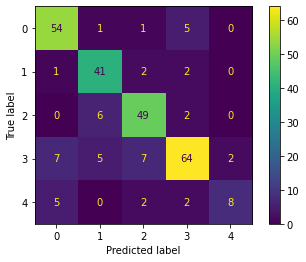

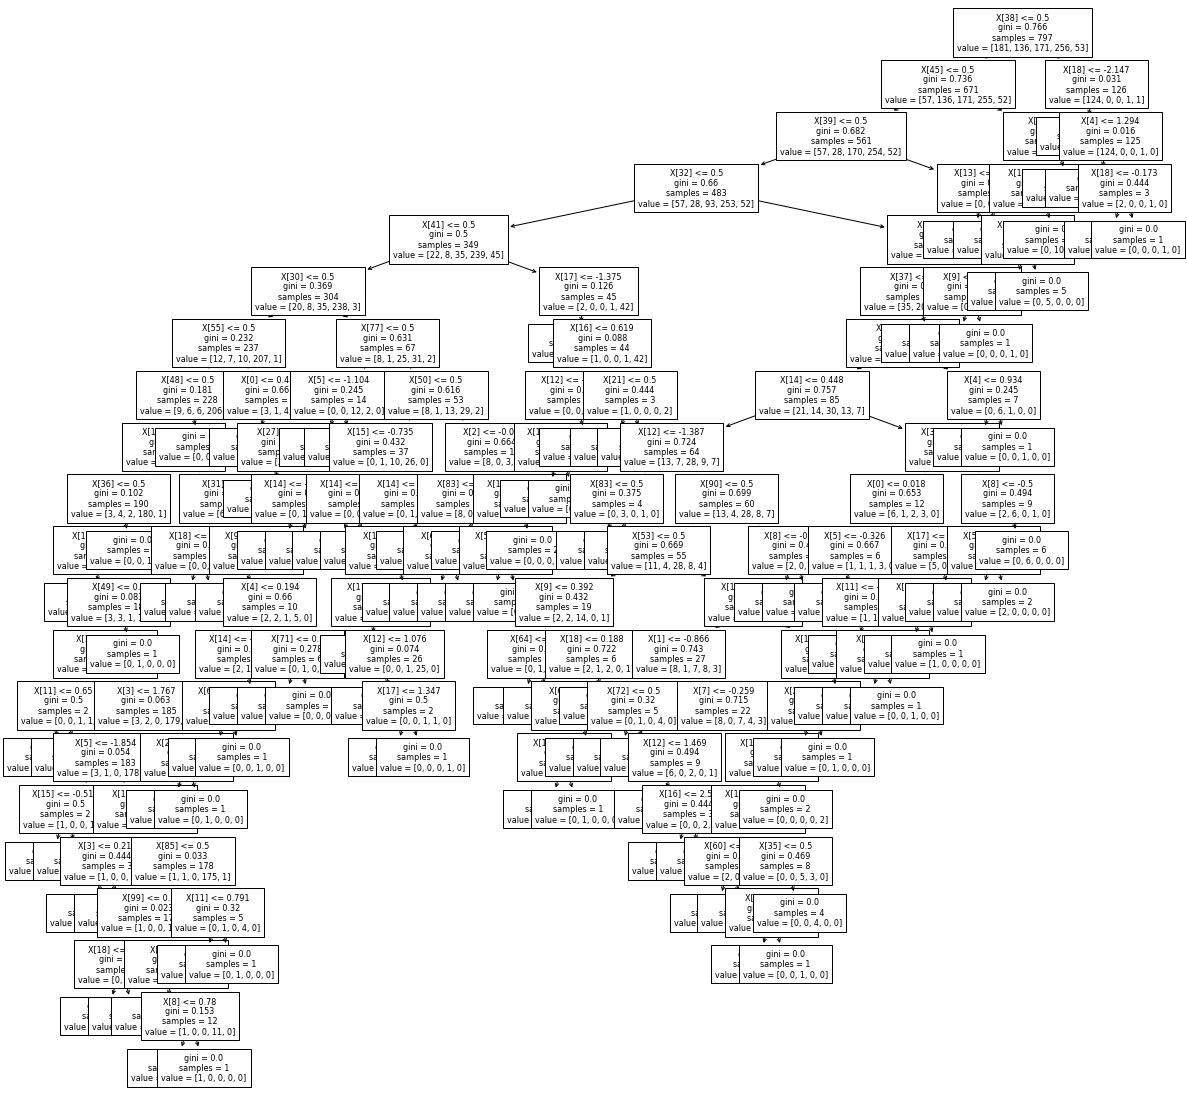

In [114]:
# sklearn imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

dectree = DecisionTreeClassifier()

pipeline = Pipeline(steps=[('preprocessor', imputer_encoder),
                      ('classifier', dectree)])

# Specify the hyperparameter space
parameters = {}

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv = 5)

# Fit to the training set
t = cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot();
print(cv.best_params_);

plt.figure(figsize=(20,20))
plot_tree(cv.best_estimator_['classifier'], fontsize=8)
plt.show()